# Rotating the RGB images

In [63]:
import rasterio
import matplotlib.pyplot as plt

def show_rgb_tif(file_path):
    """
    Load and display an RGB TIFF image using rasterio and matplotlib.

    Args:
        file_path (str): Path to the TIFF image file.
    """
    # Open the TIFF file using rasterio
    with rasterio.open(file_path) as src:
        # Read all three RGB bands
        red = src.read(1)  # First band: Red
        green = src.read(2)  # Second band: Green
        blue = src.read(3)  # Third band: Blue

    # Stack the bands together to form the RGB image
    rgb_image = np.dstack((red, green, blue))

    # Display the image using matplotlib
    plt.imshow(rgb_image)
    plt.axis('off')  # Turn off the axis labels
    plt.show()


In [77]:
import rasterio
import numpy as np
from PIL import Image

def rotate_rgb_tif(file_path, angle, save=False, output_path=None):
    """
    Rotate an RGB TIFF image by a given angle.
    
    Args:
        file_path (str): Path to the input RGB TIFF image.
        angle (float): The angle by which to rotate the image (in degrees).
        save (bool): Flag to decide whether to save the rotated image. Default is False.
        output_path (str): Path to save the rotated image (only used if save=True).
    
    Returns:
        rotated_image (PIL.Image): The rotated image (PIL format).
    """
    # Open the TIFF file using rasterio
    with rasterio.open(file_path) as src:
        # Read the three RGB bands
        red = src.read(1)  # First band: Red
        green = src.read(2)  # Second band: Green
        blue = src.read(3)  # Third band: Blue

    # Stack the bands to create a 3D RGB image
    rgb_image = np.dstack((red, green, blue))

    # Convert the NumPy array to a PIL Image
    pil_image = Image.fromarray(rgb_image)

    # Rotate the image
    rotated_image = pil_image.rotate(angle, resample=Image.BICUBIC, expand=True)

    # If save flag is True, save the rotated image
    if save:
        if not output_path:
            raise ValueError("Output path must be specified if save=True.")
        
        # Convert the rotated PIL image back to a NumPy array
        rotated_rgb = np.array(rotated_image)

        # Write the rotated image back to a TIFF file
        with rasterio.open(output_path, 'w', driver='GTiff', 
                           count=3, width=rotated_rgb.shape[1], height=rotated_rgb.shape[0], 
                           dtype=rotated_rgb.dtype) as dst:
            # Write the rotated bands to the new file
            dst.write(rotated_rgb[:, :, 0], 1)  # Red channel
            dst.write(rotated_rgb[:, :, 1], 2)  # Green channel
            dst.write(rotated_rgb[:, :, 2], 3)  # Blue channel

        print(f"✅ Image rotated and saved to {output_path}")

    # Return the rotated image without saving (if save=False)
    return rotated_image

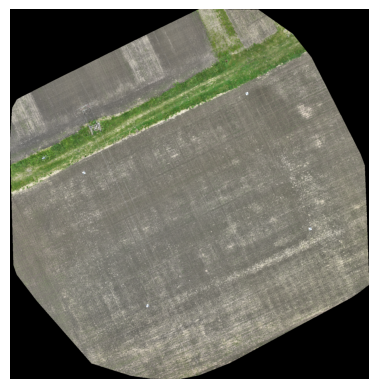

In [78]:
import os
folder_path = r"D:\PhenoCrop\2_2_Orthomosaics_resized\E166\RGB"
files = os.listdir(path)
full_paths = [os.path.join(folder_path, file_name) for file_name in files]
full_paths[1]
show_rgb_tif(full_paths[1])

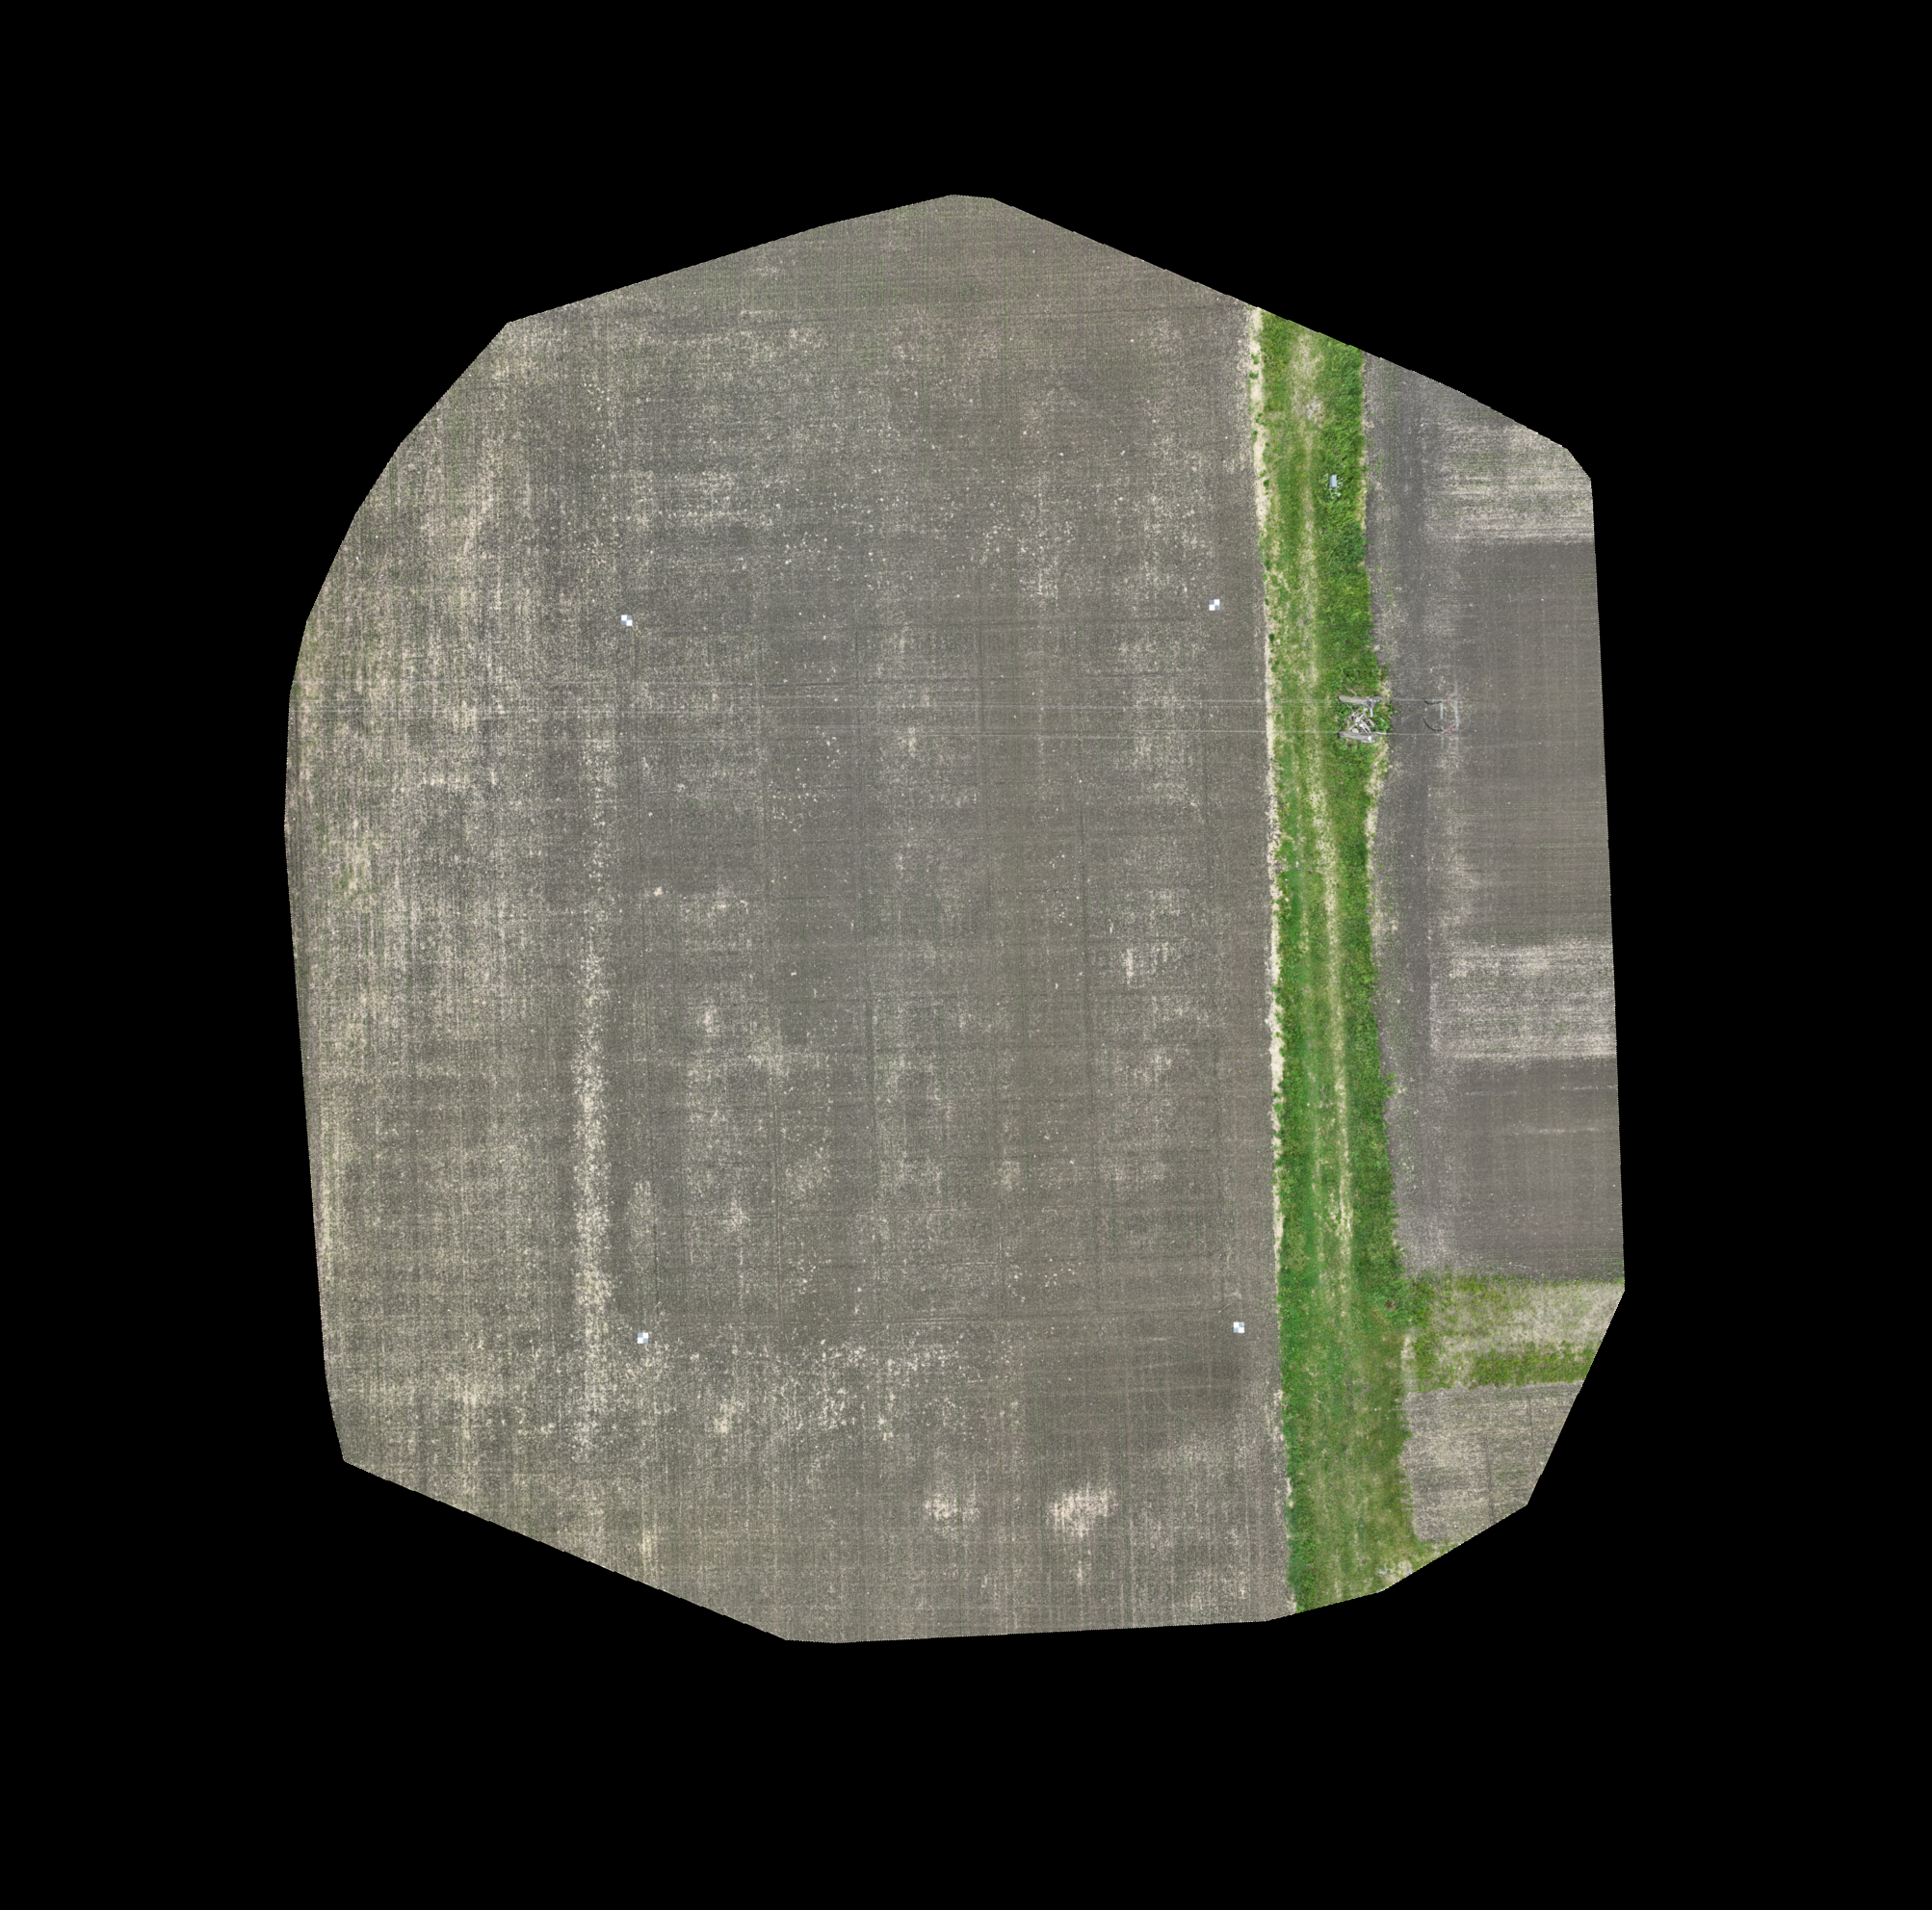

In [76]:
# Example usage:
rotated_image = rotate_rgb_tif(full_paths[1], -114)
rotated_image
# To save it:
# rotate_rgb_tif('path/to/your_rgb_image.tif', 45, save=True, output_path='path/to/output_rotated_image.tif')

# Rotating RGB

In [ ]:
# Example Usage
root_folder = r"D:\PhenoCrop\2_pix4d"  # Change to your actual root folder
output_folder = r"D:\PhenoCrop\2_3_Orthomosaics_resized"  # Base output directory

# Define search criteria with scale factors
search_config = {
    # "RGB": ("_transparent_mosaic_group1.tif", 0.25), # JPG files scaled to 25%
    "NDVI": ("_index_ndvi.tif", 0.5), # TIFF files scaled to 50%
    # "Green": ("_index_green_green.tif", 0.5),
    # "NIR": ("_index_nir_nir.tif", 0.5),
    # "RedEdge": ("_index_red_edge_red_edge.tif", 0.5),
    # "Red": ("_index_red_red.tif", 0.5)
}

# User-defined rotation angles per project (if available)
rotation_dict = {
     'PHENO_CROP': -13.5,
     'OAT_FRONTIERS': -13.5,
     'DIVERSITY_OATS': -13.5,
     'PRO_BAR_VOLL': -29.5,
     'E166': -115.5,
     'PRO_BAR_SØRÅS': -68.5
}

# Rotating NDVI

In [17]:
def find_orthomosaic_files(input_folder, search_config):
    """
    Find orthomosaic files based on the path structure and search configuration.
    
    Args:
        input_folder (str): The base directory where field_name/key_word/ files are located.
        search_config (dict): Dictionary with keywords and suffixes to search for.
        
    Returns:
        dict: Dictionary with keyword as keys and field names with their file lists.
    """
    orthomosaic_files = {}

    # Walk through the field_name folders inside input_folder
    for field_name in os.listdir(input_folder):
        field_path = os.path.join(input_folder, field_name)
        
        # Skip if not a directory
        if not os.path.isdir(field_path):
            continue
        
        for key_word, (suffix, _) in search_config.items():
            # Search for files under the key_word folder
            key_word_folder = os.path.join(field_path, key_word, colorpalette)
            # If the key_word folder exists, search for orthomosaics
            if os.path.isdir(key_word_folder):
                file_paths = glob.glob(os.path.join(key_word_folder, f'*{suffix}'))
                if file_paths:
                    if key_word not in orthomosaic_files:
                        orthomosaic_files[key_word] = {}
                    orthomosaic_files[key_word][field_name] = file_paths

    return orthomosaic_files


In [18]:
colorpalette = 'rainbow4'
orthomosaic_files = find_orthomosaic_files(input_folder, search_config)
orthomosaic_files

{'NDVI': {'DIVERSITY_OATS': ['D:\\PhenoCrop\\NDVI_rainbow4_0.5-1.0\\DIVERSITY_OATS\\NDVI\\rainbow4\\20240603 DIVERSITY_OATS M3M 30m MS 80 85_index_ndvi_50%_rainbow4.tif',
   'D:\\PhenoCrop\\NDVI_rainbow4_0.5-1.0\\DIVERSITY_OATS\\NDVI\\rainbow4\\20240607 DIVERSITY_OATS M3M 30m MS 80 85_index_ndvi_50%_rainbow4.tif',
   'D:\\PhenoCrop\\NDVI_rainbow4_0.5-1.0\\DIVERSITY_OATS\\NDVI\\rainbow4\\20240611 DIVERSITY_OATS M3M 30m MS 80 85_index_ndvi_50%_rainbow4.tif',
   'D:\\PhenoCrop\\NDVI_rainbow4_0.5-1.0\\DIVERSITY_OATS\\NDVI\\rainbow4\\20240619 DIVERSITY_OATS M3M 30m MS 80 85_index_ndvi_50%_rainbow4.tif',
   'D:\\PhenoCrop\\NDVI_rainbow4_0.5-1.0\\DIVERSITY_OATS\\NDVI\\rainbow4\\20240624 DIVERSITY_OATS M3M 30m MS 80 85_index_ndvi_50%_rainbow4.tif',
   'D:\\PhenoCrop\\NDVI_rainbow4_0.5-1.0\\DIVERSITY_OATS\\NDVI\\rainbow4\\20240703 DIVERSITY_OATS M3M 30m MS 80 85_index_ndvi_50%_rainbow4.tif',
   'D:\\PhenoCrop\\NDVI_rainbow4_0.5-1.0\\DIVERSITY_OATS\\NDVI\\rainbow4\\20240708 DIVERSITY_OATS M3M 30

In [12]:
def process_orthomosaics_with_rotation(orthomosaic_files, roration, output_folder):
    """Process each orthomosaic with the selected colormaps and save to subfolders with color bar."""
    for key_word, field_dict in orthomosaic_files.items():
        for field_name, file_list in field_dict.items():
            print(f"\nProcessing orthomosaics for field: {field_name} under keyword: {key_word}")
            
            for colormap_name in colormap_dict:
                colormap_folder = os.path.join(output_folder, field_name, key_word, colormap_name)
                os.makedirs(colormap_folder, exist_ok=True)
                
                for file_path in file_list:
                    output_path = os.path.join(colormap_folder, os.path.basename(file_path))
                    process_ndvi_tif(file_path, output_path, colormap_name)
            gc.collect()
    print("\n✅ Colorization complete for all images!")

'D:\\PhenoCrop\\NDVI_rainbow4_0.5-1.0'

In [4]:
# Example Usage
input_folder = r"D:\PhenoCrop\NDVI_rainbow4_0.5-1.0"  # Change to your actual root folder
output_folder = r"D:\PhenoCrop\NDVI_rainbow4_0.5-1.0_ROTATED"  # Base output directory

# Define search criteria with scale factors
search_config = {
    # "RGB": ("_transparent_mosaic_group1.tif", 0.25), # JPG files scaled to 25%
    "NDVI": ("_index_ndvi.tif", 0.5), # TIFF files scaled to 50%
    # "Green": ("_index_green_green.tif", 0.5),
    # "NIR": ("_index_nir_nir.tif", 0.5),
    # "RedEdge": ("_index_red_edge_red_edge.tif", 0.5),
    # "Red": ("_index_red_red.tif", 0.5)
}

# User-defined rotation angles per project (if available)
rotation_dict = {
     'PHENO_CROP': -13.5,
     'OAT_FRONTIERS': -13.5,
     'DIVERSITY_OATS': -13.5,
     'PRO_BAR_VOLL': -29.5,
     'E166': -115.5,
     'PRO_BAR_SØRÅS': -68.5
}

# All together

In [5]:
import os
import glob
import rasterio
import numpy as np
from PIL import Image


def find_orthomosaic_files(input_folder, search_config):
    """
    Find orthomosaic files based on the path structure and search configuration.
    
    Args:
        input_folder (str): The base directory where field_name/key_word/ files are located.
        search_config (dict): Dictionary with keywords and suffixes to search for.
        
    Returns:
        dict: Dictionary with keyword as keys and field names with their file lists.
    """
    orthomosaic_files = {}

    # Walk through the field_name folders inside input_folder
    for field_name in os.listdir(input_folder):
        field_path = os.path.join(input_folder, field_name)
        
        # Skip if not a directory
        if not os.path.isdir(field_path):
            continue
        
        for key_word, (suffix, _) in search_config.items():
            # Search for files under the key_word folder
            key_word_folder = os.path.join(field_path, key_word)

            # If the key_word folder exists, search for orthomosaics
            if os.path.isdir(key_word_folder):
                file_paths = glob.glob(os.path.join(key_word_folder, f'*{suffix}'))
                if file_paths:
                    if key_word not in orthomosaic_files:
                        orthomosaic_files[key_word] = {}
                    orthomosaic_files[key_word][field_name] = file_paths

    return orthomosaic_files


In [7]:
orthomosaic_files = find_orthomosaic_files(input_folder, search_config)
orthomosaic_files

{}

In [81]:


def rotate_rgb_tif(file_path, angle):
    """Rotate an RGB TIFF image by the given angle."""
    with rasterio.open(file_path) as src:
        # Read the three bands of the RGB image
        red = src.read(1)
        green = src.read(2)
        blue = src.read(3)

        # Stack the bands into a 3D array (RGB)
        rgb_image = np.stack([red, green, blue], axis=-1)

        # Rotate the image using Pillow (after converting to PIL image)
        pil_image = Image.fromarray(rgb_image)
        rotated_pil_image = pil_image.rotate(angle, resample=Image.BICUBIC, expand=True)

        # Convert the rotated image back to a numpy array
        rotated_rgb_image = np.array(rotated_pil_image)

        return rotated_rgb_image


def save_rotated_image(rotated_image, output_path):
    """Save the rotated image to the specified output path."""
    with rasterio.open(output_path, 'w', driver='GTiff', height=rotated_image.shape[0],
                       width=rotated_image.shape[1], count=3, dtype='uint8') as dst:
        for i in range(3):  # Save each RGB channel
            dst.write(rotated_image[..., i], i + 1)


def process_rotation_and_save(orthomosaic_files, rotation_dict, output_folder):
    """
    Process each orthomosaic based on the rotation_dict, rotate images, and save them.
    
    Args:
        orthomosaic_files (dict): Dictionary of files to be processed.
        rotation_dict (dict): Dictionary of rotation angles per field_name.
        output_folder (str): The output directory where rotated images will be saved.
    """
    for key_word, field_dict in orthomosaic_files.items():
        for field_name, file_list in field_dict.items():
            # Check if there is a predefined rotation for the field_name
            if field_name in rotation_dict:
                rotation_angle = rotation_dict[field_name]
                print(f"Rotating {field_name} with {rotation_angle}°...")

                for file_path in file_list:
                    # Apply rotation
                    rotated_image = rotate_rgb_tif(file_path, rotation_angle)

                    # Define the output path for the rotated image
                    file_name = os.path.basename(file_path)
                    output_path = os.path.join(output_folder, field_name, key_word, file_name)

                    # Ensure the output folder exists
                    os.makedirs(os.path.dirname(output_path), exist_ok=True)

                    # Save the rotated image
                    save_rotated_image(rotated_image, output_path)
                    print(f"✅ Saved rotated image: {output_path}")
            else:
                print(f"⚠️ No rotation defined for {field_name}. Skipping rotation.")





In [80]:
import os
from PIL import Image
import rasterio
from rasterio.enums import Resampling

def rotate_rgb_tif(file_path, angle):
    """Rotate an RGB TIFF image by the given angle."""
    with rasterio.open(file_path) as src:
        # Read the three bands of the RGB image
        red = src.read(1)
        green = src.read(2)
        blue = src.read(3)

        # Stack the bands into a 3D array (RGB)
        rgb_image = np.stack([red, green, blue], axis=-1)

        # Rotate the image using Pillow (after converting to PIL image)
        pil_image = Image.fromarray(rgb_image)
        rotated_pil_image = pil_image.rotate(angle, resample=Image.BICUBIC, expand=True)

        # Convert the rotated image back to a numpy array
        rotated_rgb_image = np.array(rotated_pil_image)

        return rotated_rgb_image

def save_rotated_image(rotated_image, output_path):
    """Save the rotated image to the specified output path."""
    with rasterio.open(output_path, 'w', driver='GTiff', height=rotated_image.shape[0],
                       width=rotated_image.shape[1], count=3, dtype='uint8') as dst:
        for i in range(3):  # Save each RGB channel
            dst.write(rotated_image[..., i], i + 1)

def process_rotation_and_save(orthomosaic_files, rotation_dict, output_folder):
    """
    Process each orthomosaic based on the rotation_dict, rotate images, and save them.
    
    Args:
        orthomosaic_files (dict): Dictionary of files to be processed.
        rotation_dict (dict): Dictionary of rotation angles per field_name.
        output_folder (str): The output directory where rotated images will be saved.
    """
    for key_word, field_dict in orthomosaic_files.items():
        for field_name, file_list in field_dict.items():
            # Check if there is a predefined rotation for the field_name
            if field_name in rotation_dict:
                rotation_angle = rotation_dict[field_name]
                print(f"Rotating {field_name} with {rotation_angle}°...")

                for file_path in file_list:
                    # Apply rotation
                    rotated_image = rotate_rgb_tif(file_path, rotation_angle)

                    # Define the output path for the rotated image
                    file_name = os.path.basename(file_path)
                    output_path = os.path.join(output_folder, field_name, key_word, file_name)

                    # Ensure the output folder exists
                    os.makedirs(os.path.dirname(output_path), exist_ok=True)

                    # Save the rotated image
                    save_rotated_image(rotated_image, output_path)
                    print(f"✅ Saved rotated image: {output_path}")
            else:
                print(f"⚠️ No rotation defined for {field_name}. Skipping rotation.")


In [125]:
# Example usage:

# Define the input folder where the projects and orthomosaics are stored
input_folder = r"D:\PhenoCrop\2_2_Orthomosaics_resized"

# Example search configuration to find TIFF or JPG files
search_config = {
    "RGB": ("_transparent_mosaic_group1.tif", 0.25), # JPG files scaled to 25%
    # "NDVI": ("_index_ndvi.tif", 0.5), # TIFF files scaled to 50%
}

# Define the output folder to save rotated files
output_folder = r"D:\PhenoCrop\2_3_Orthomosaics_resized"

# Rotation angles for specific fields
rotation_dict = {
     # 'PHENO_CROP': -13.5,
     'OAT_FRONTIERS': -13.5,
     # 'DIVERSITY_OATS': -13.5,
     # 'PRO_BAR_VOLL': -29.5,
     # 'E166': -115.5,
     # 'PRO_BAR_SØRÅS': -68.5
}

# Find orthomosaic files
orthomosaic_files = find_orthomosaic_files(input_folder, search_config)

# Process the images with rotation and save them
process_rotation_and_save(orthomosaic_files, rotation_dict, output_folder)

Rotating DIVERSITY_OATS with -12°...
✅ Saved rotated image: D:\PhenoCrop\2_3_Orthomosaics_resized\DIVERSITY_OATS\RGB\20240603 DIVERSITY_OATS M3M 30m MS 80 85_transparent_mosaic_group1_25%.tif
✅ Saved rotated image: D:\PhenoCrop\2_3_Orthomosaics_resized\DIVERSITY_OATS\RGB\20240607 DIVERSITY_OATS M3M 30m MS 80 85_transparent_mosaic_group1_25%.tif
✅ Saved rotated image: D:\PhenoCrop\2_3_Orthomosaics_resized\DIVERSITY_OATS\RGB\20240611 DIVERSITY_OATS M3M 30m MS 80 85_transparent_mosaic_group1_25%.tif
✅ Saved rotated image: D:\PhenoCrop\2_3_Orthomosaics_resized\DIVERSITY_OATS\RGB\20240619 DIVERSITY_OATS M3M 30m MS 80 85_transparent_mosaic_group1_25%.tif
✅ Saved rotated image: D:\PhenoCrop\2_3_Orthomosaics_resized\DIVERSITY_OATS\RGB\20240624 DIVERSITY_OATS M3M 30m MS 80 85_transparent_mosaic_group1_25%.tif
✅ Saved rotated image: D:\PhenoCrop\2_3_Orthomosaics_resized\DIVERSITY_OATS\RGB\20240703 DIVERSITY_OATS M3M 30m MS 80 85_transparent_mosaic_group1_25%.tif
✅ Saved rotated image: D:\PhenoCr

In [ ]:

# Example usage (assuming `orthomosaic_files` is already populated):
rotation_dict = {
     'PHENO_CROP': -13.5,
     'OAT_FRONTIERS': -13.5,
     'DIVERSITY_OATS': -13.5,
     'PRO_BAR_VOLL': -29.5,
     'E166': -115.5,
     'PRO_BAR_SØRÅS': -68.5
}

# Process the images based on the dictionary
process_rotation_and_save(orthomosaic_files, rotation_dict, output_folder)
